In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv', 
                 index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [21]:
x = df.iloc[:,:-1]
y = df['Species']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [23]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred


array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [25]:
dt.feature_importances_

array([0.        , 0.02764493, 0.67387845, 0.29847662])


## Model Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [29]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.9666666666666667


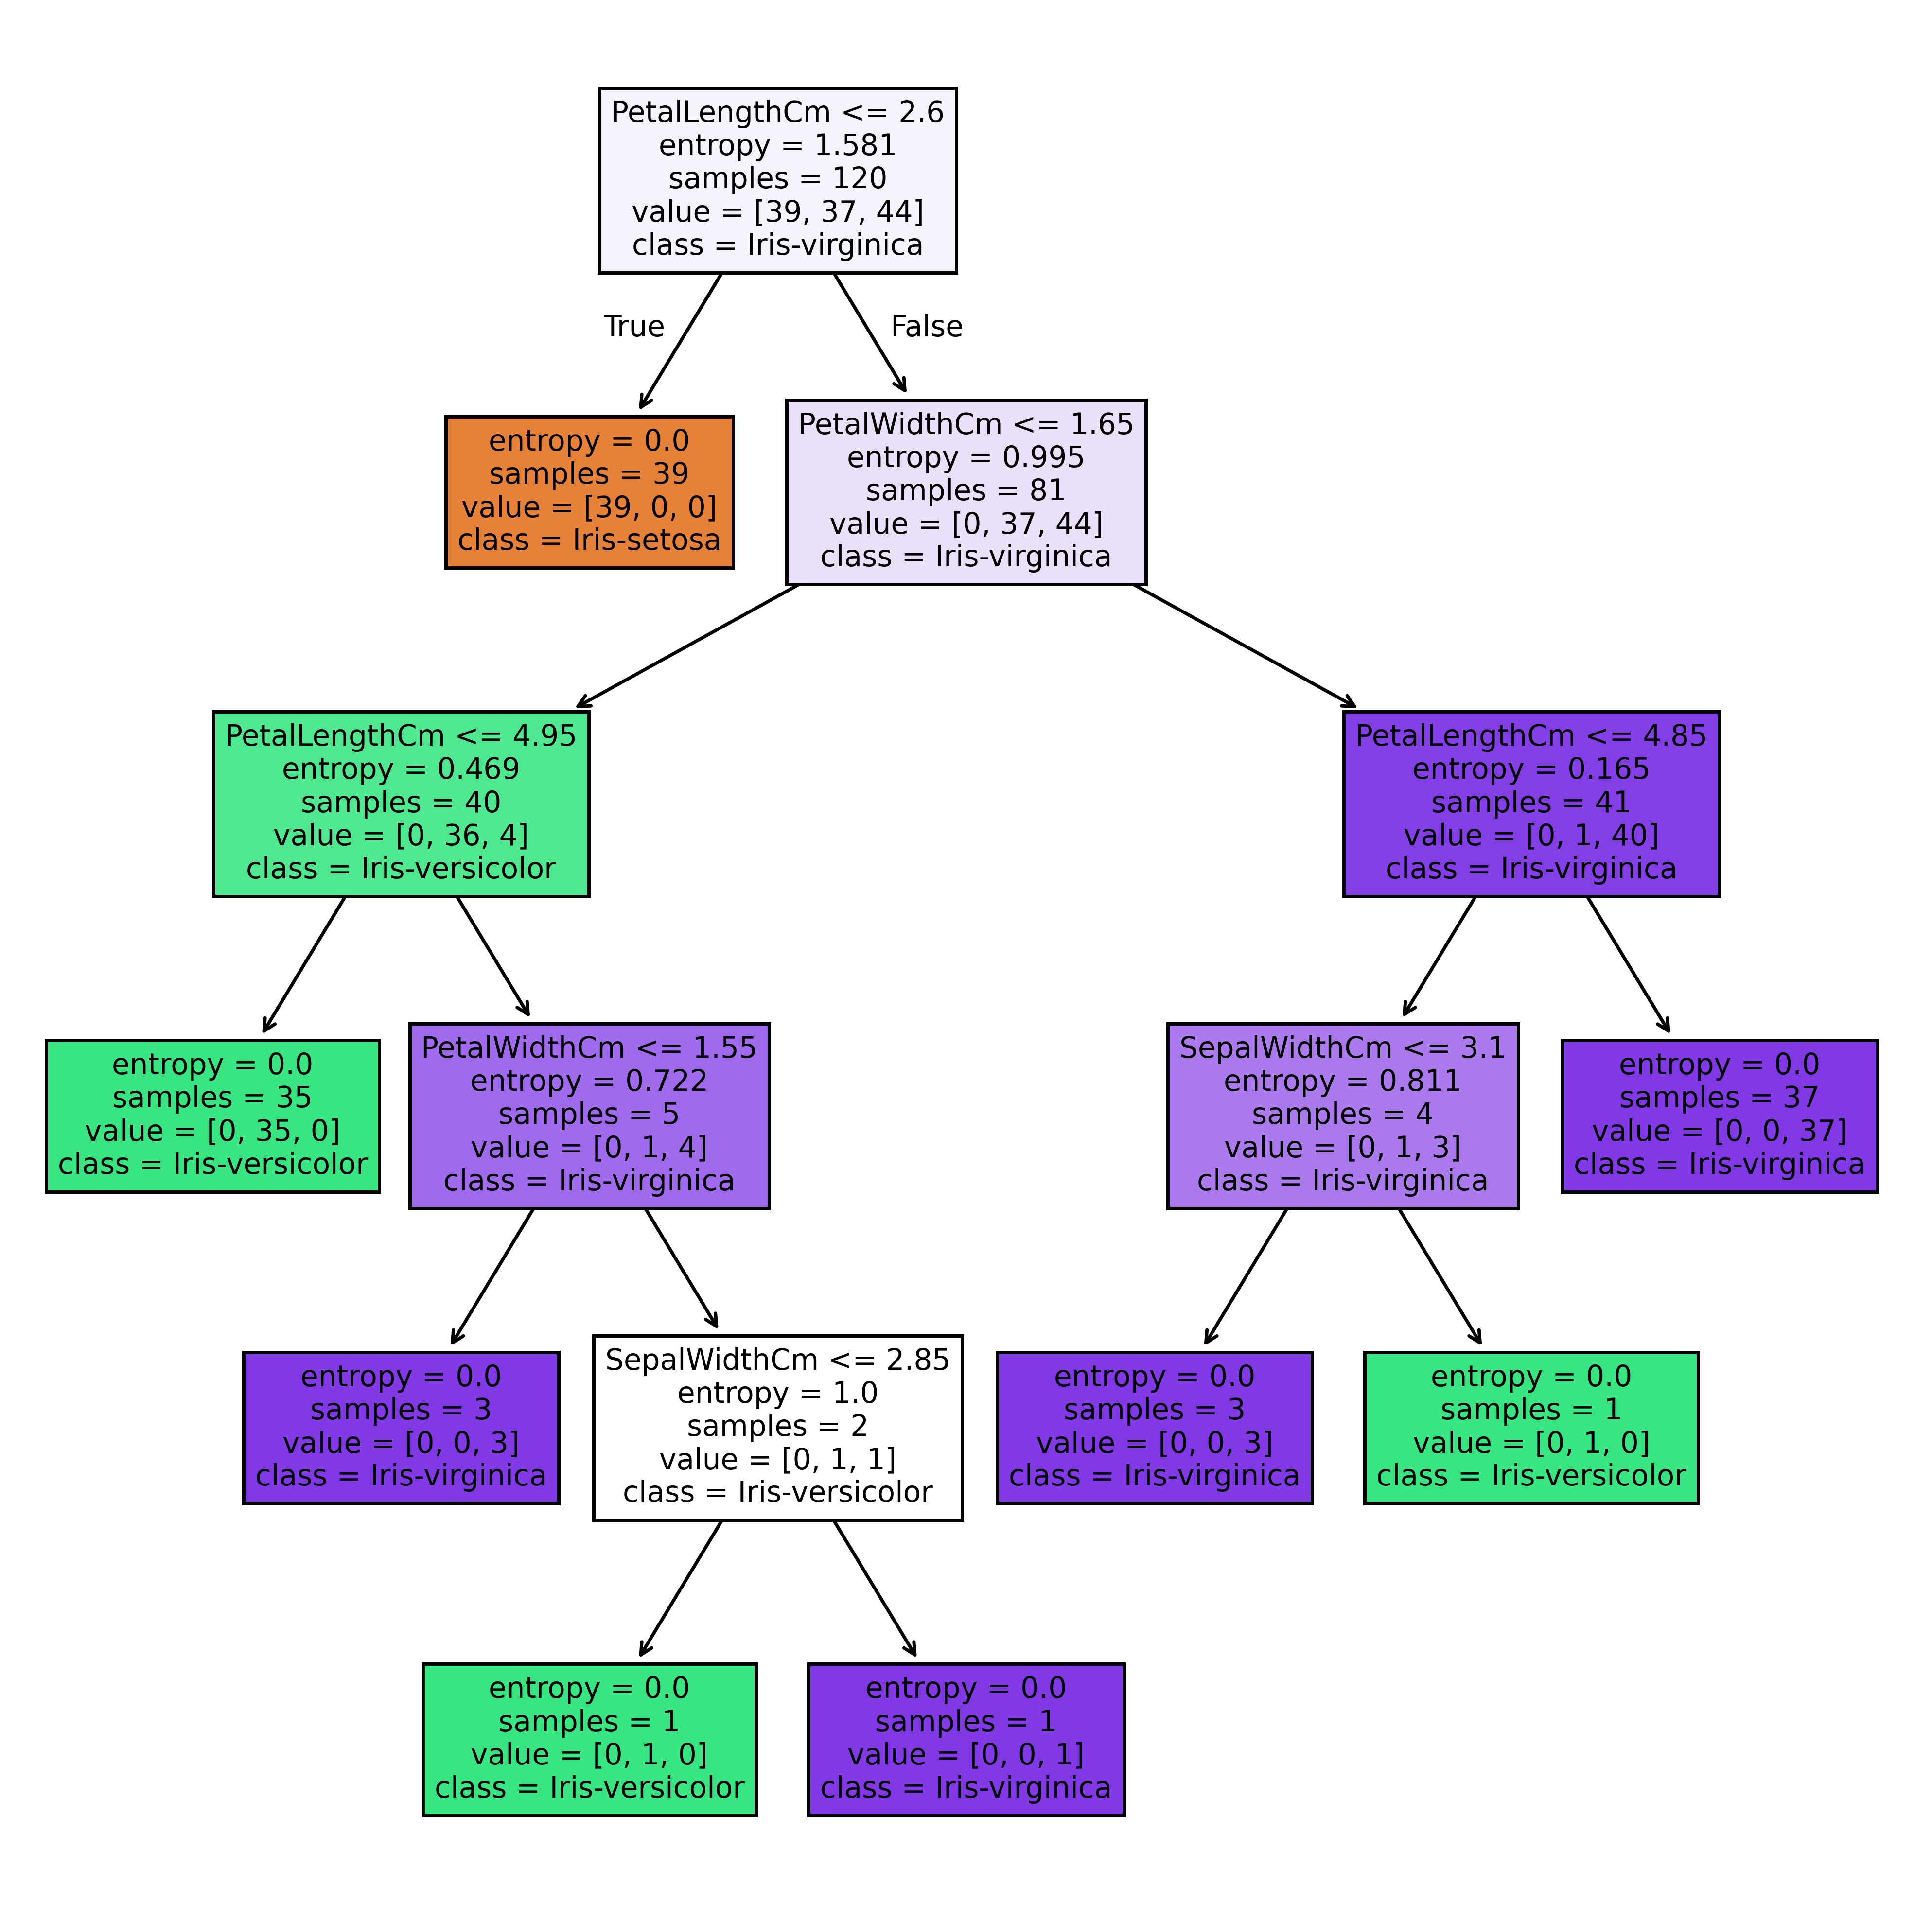

In [30]:
tree.plot_tree(dt, feature_names= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
              class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
              filled=True)
plt.show()

In [31]:
# Information Gain Value
dt.feature_importances_

array([0.        , 0.02764493, 0.67387845, 0.29847662])

In [32]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# CART

In [33]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [34]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [35]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 0.9666666666666667)

# Regression

In [36]:
x = df.iloc[:,:3]
y = df['PetalWidthCm']

In [37]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,,,
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
...,...,...,...
146,6.7,3.0,5.2
147,6.3,2.5,5.0
148,6.5,3.0,5.2


In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([1.4, 0.4, 1.4, 1.5, 1.5, 0.2, 1. , 1.5, 1.7, 1. , 1.8, 0.2, 0.2,
       0.1, 0.4, 1.5, 1.8, 1.3, 1.5, 1.8, 0.2, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.5, 2.3, 0.2, 0.2, 0.3, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.3,
       0.2, 1.9, 1.5, 1.4, 0.2, 0.2])

In [41]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.998523988291134, 0.9026110025132644)

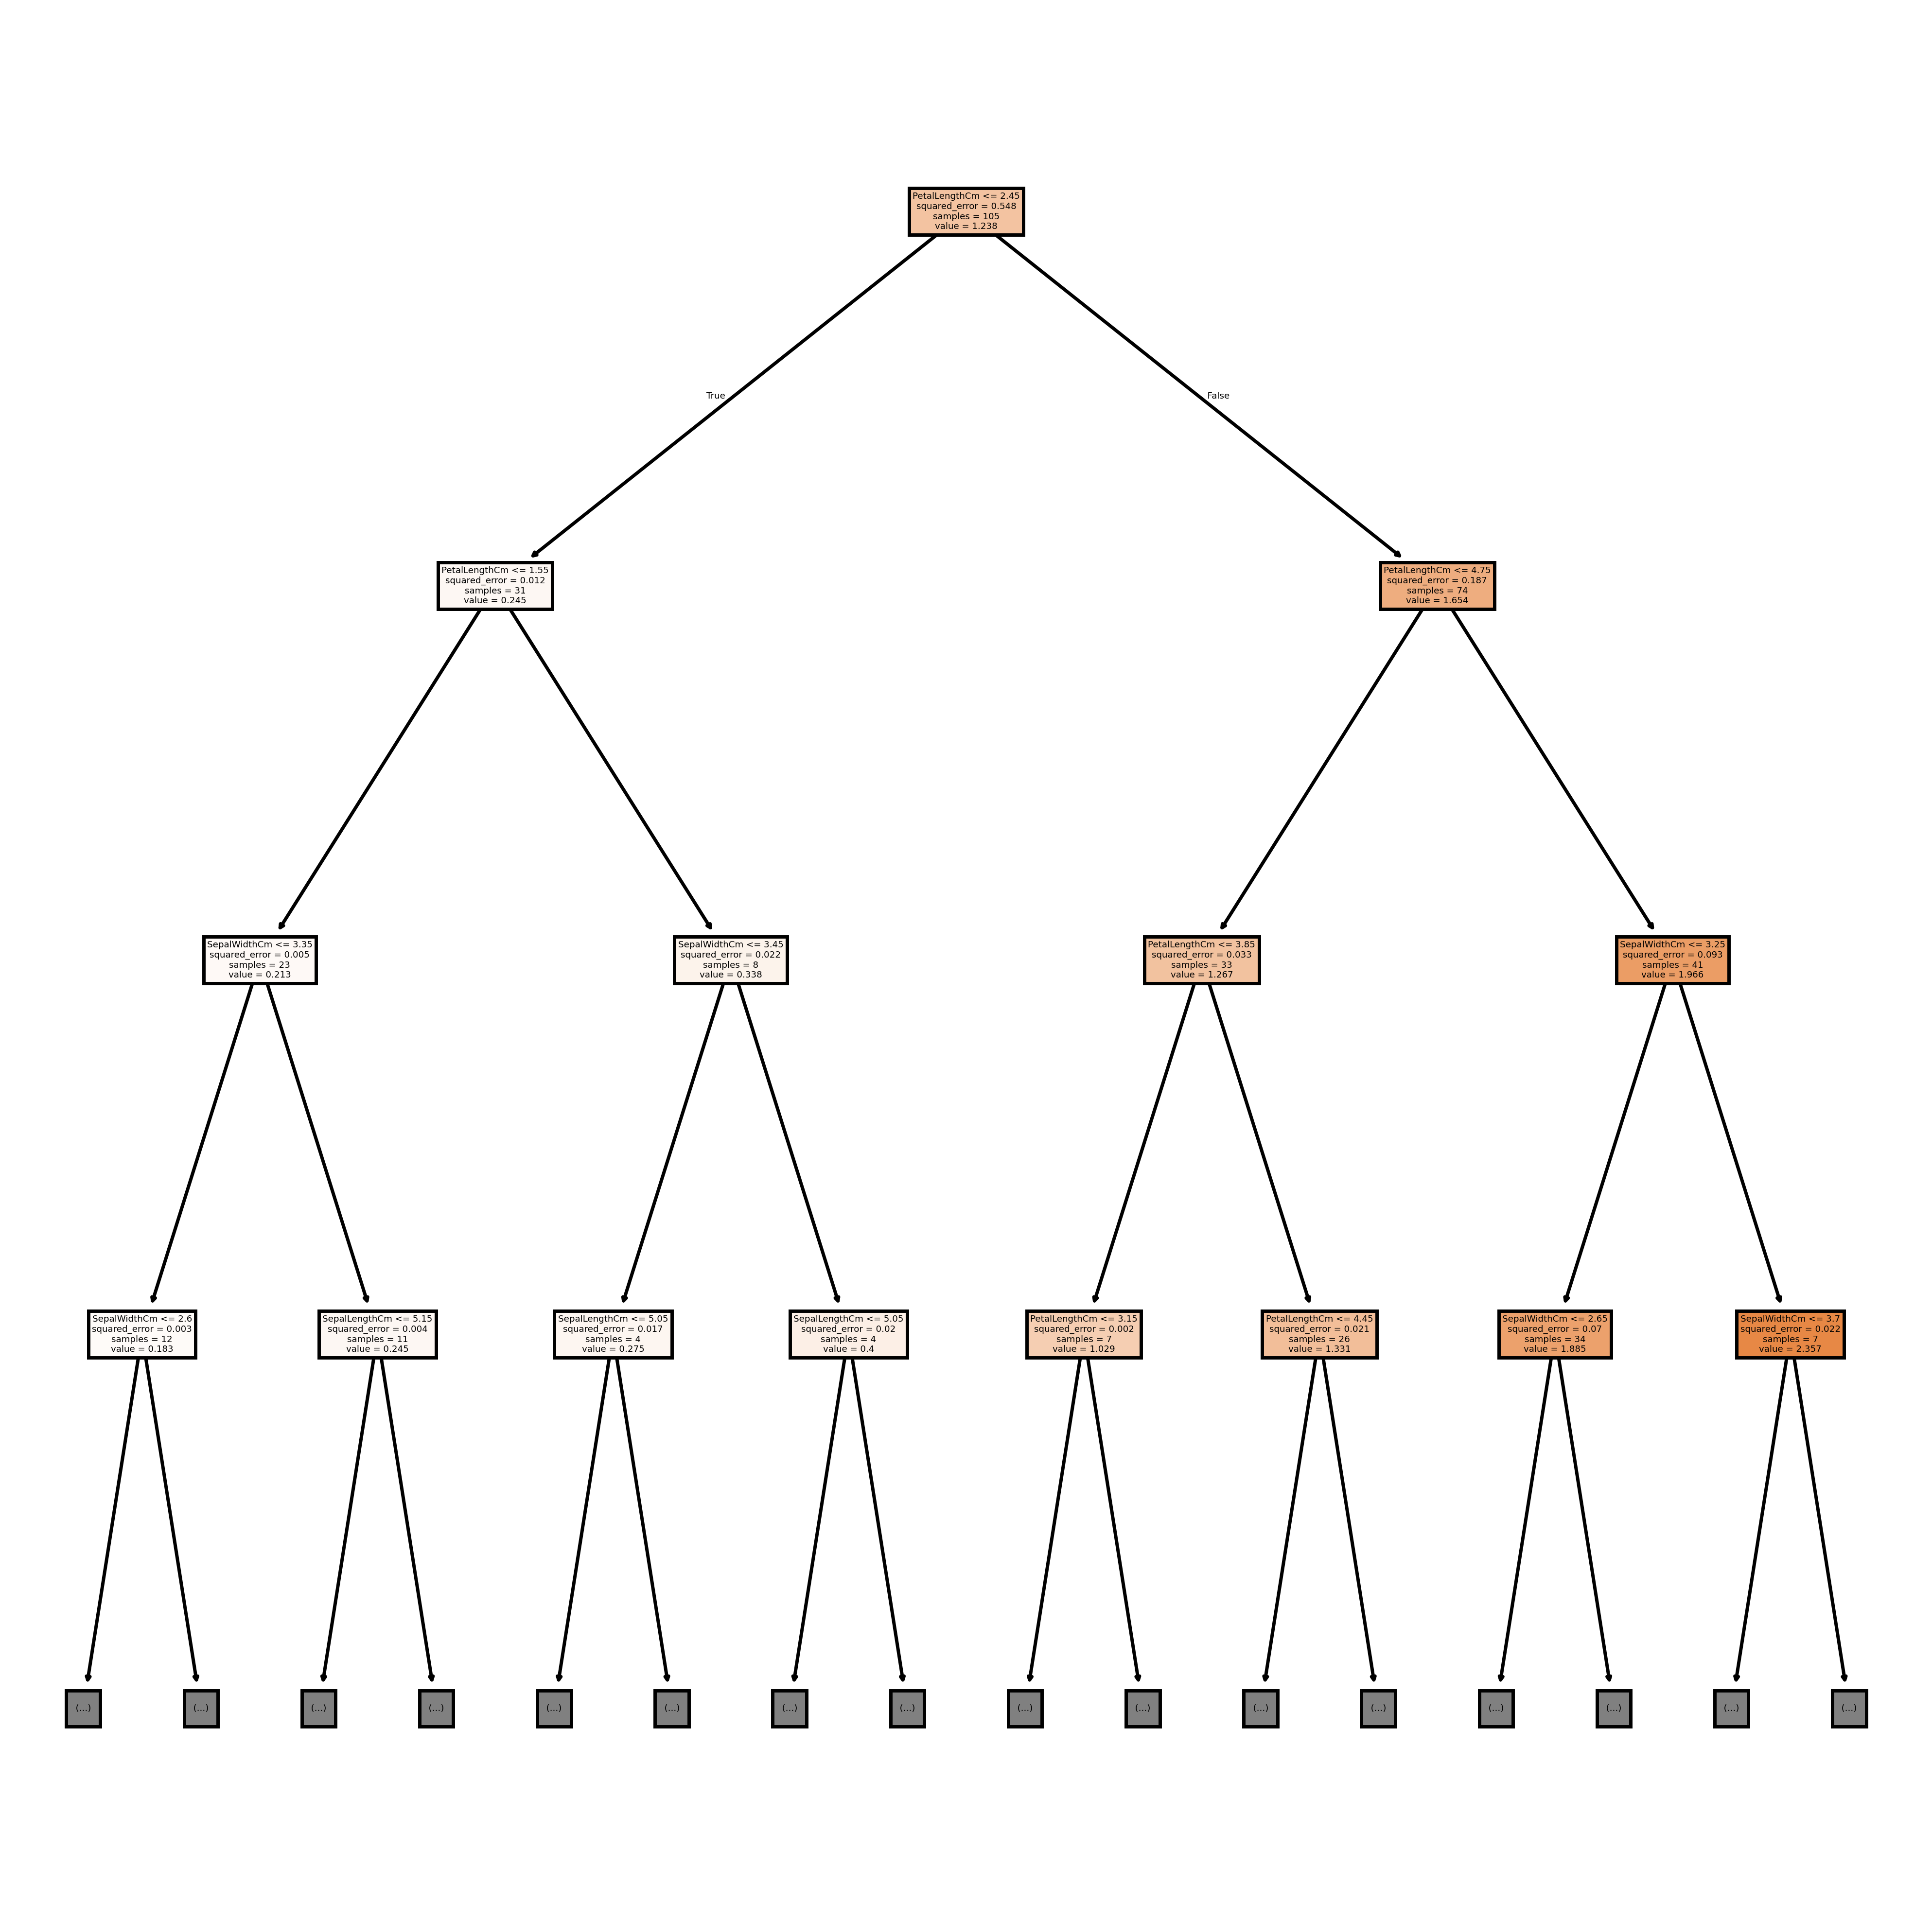

In [42]:
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],max_depth=3, filled=True)
plt.show()


# Hyperparameter tuning


In [43]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [44]:

from sklearn.model_selection import GridSearchCV

In [45]:

params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [46]:

grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [47]:

grid.fit(xtrain,ytrain)

grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'criterion': 'squared_error', 'max_depth': 5, 'splitter': 'random'}

In [48]:

dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=3,splitter='best')

In [49]:

dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [50]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9419858001628175, 0.9327669485234616)

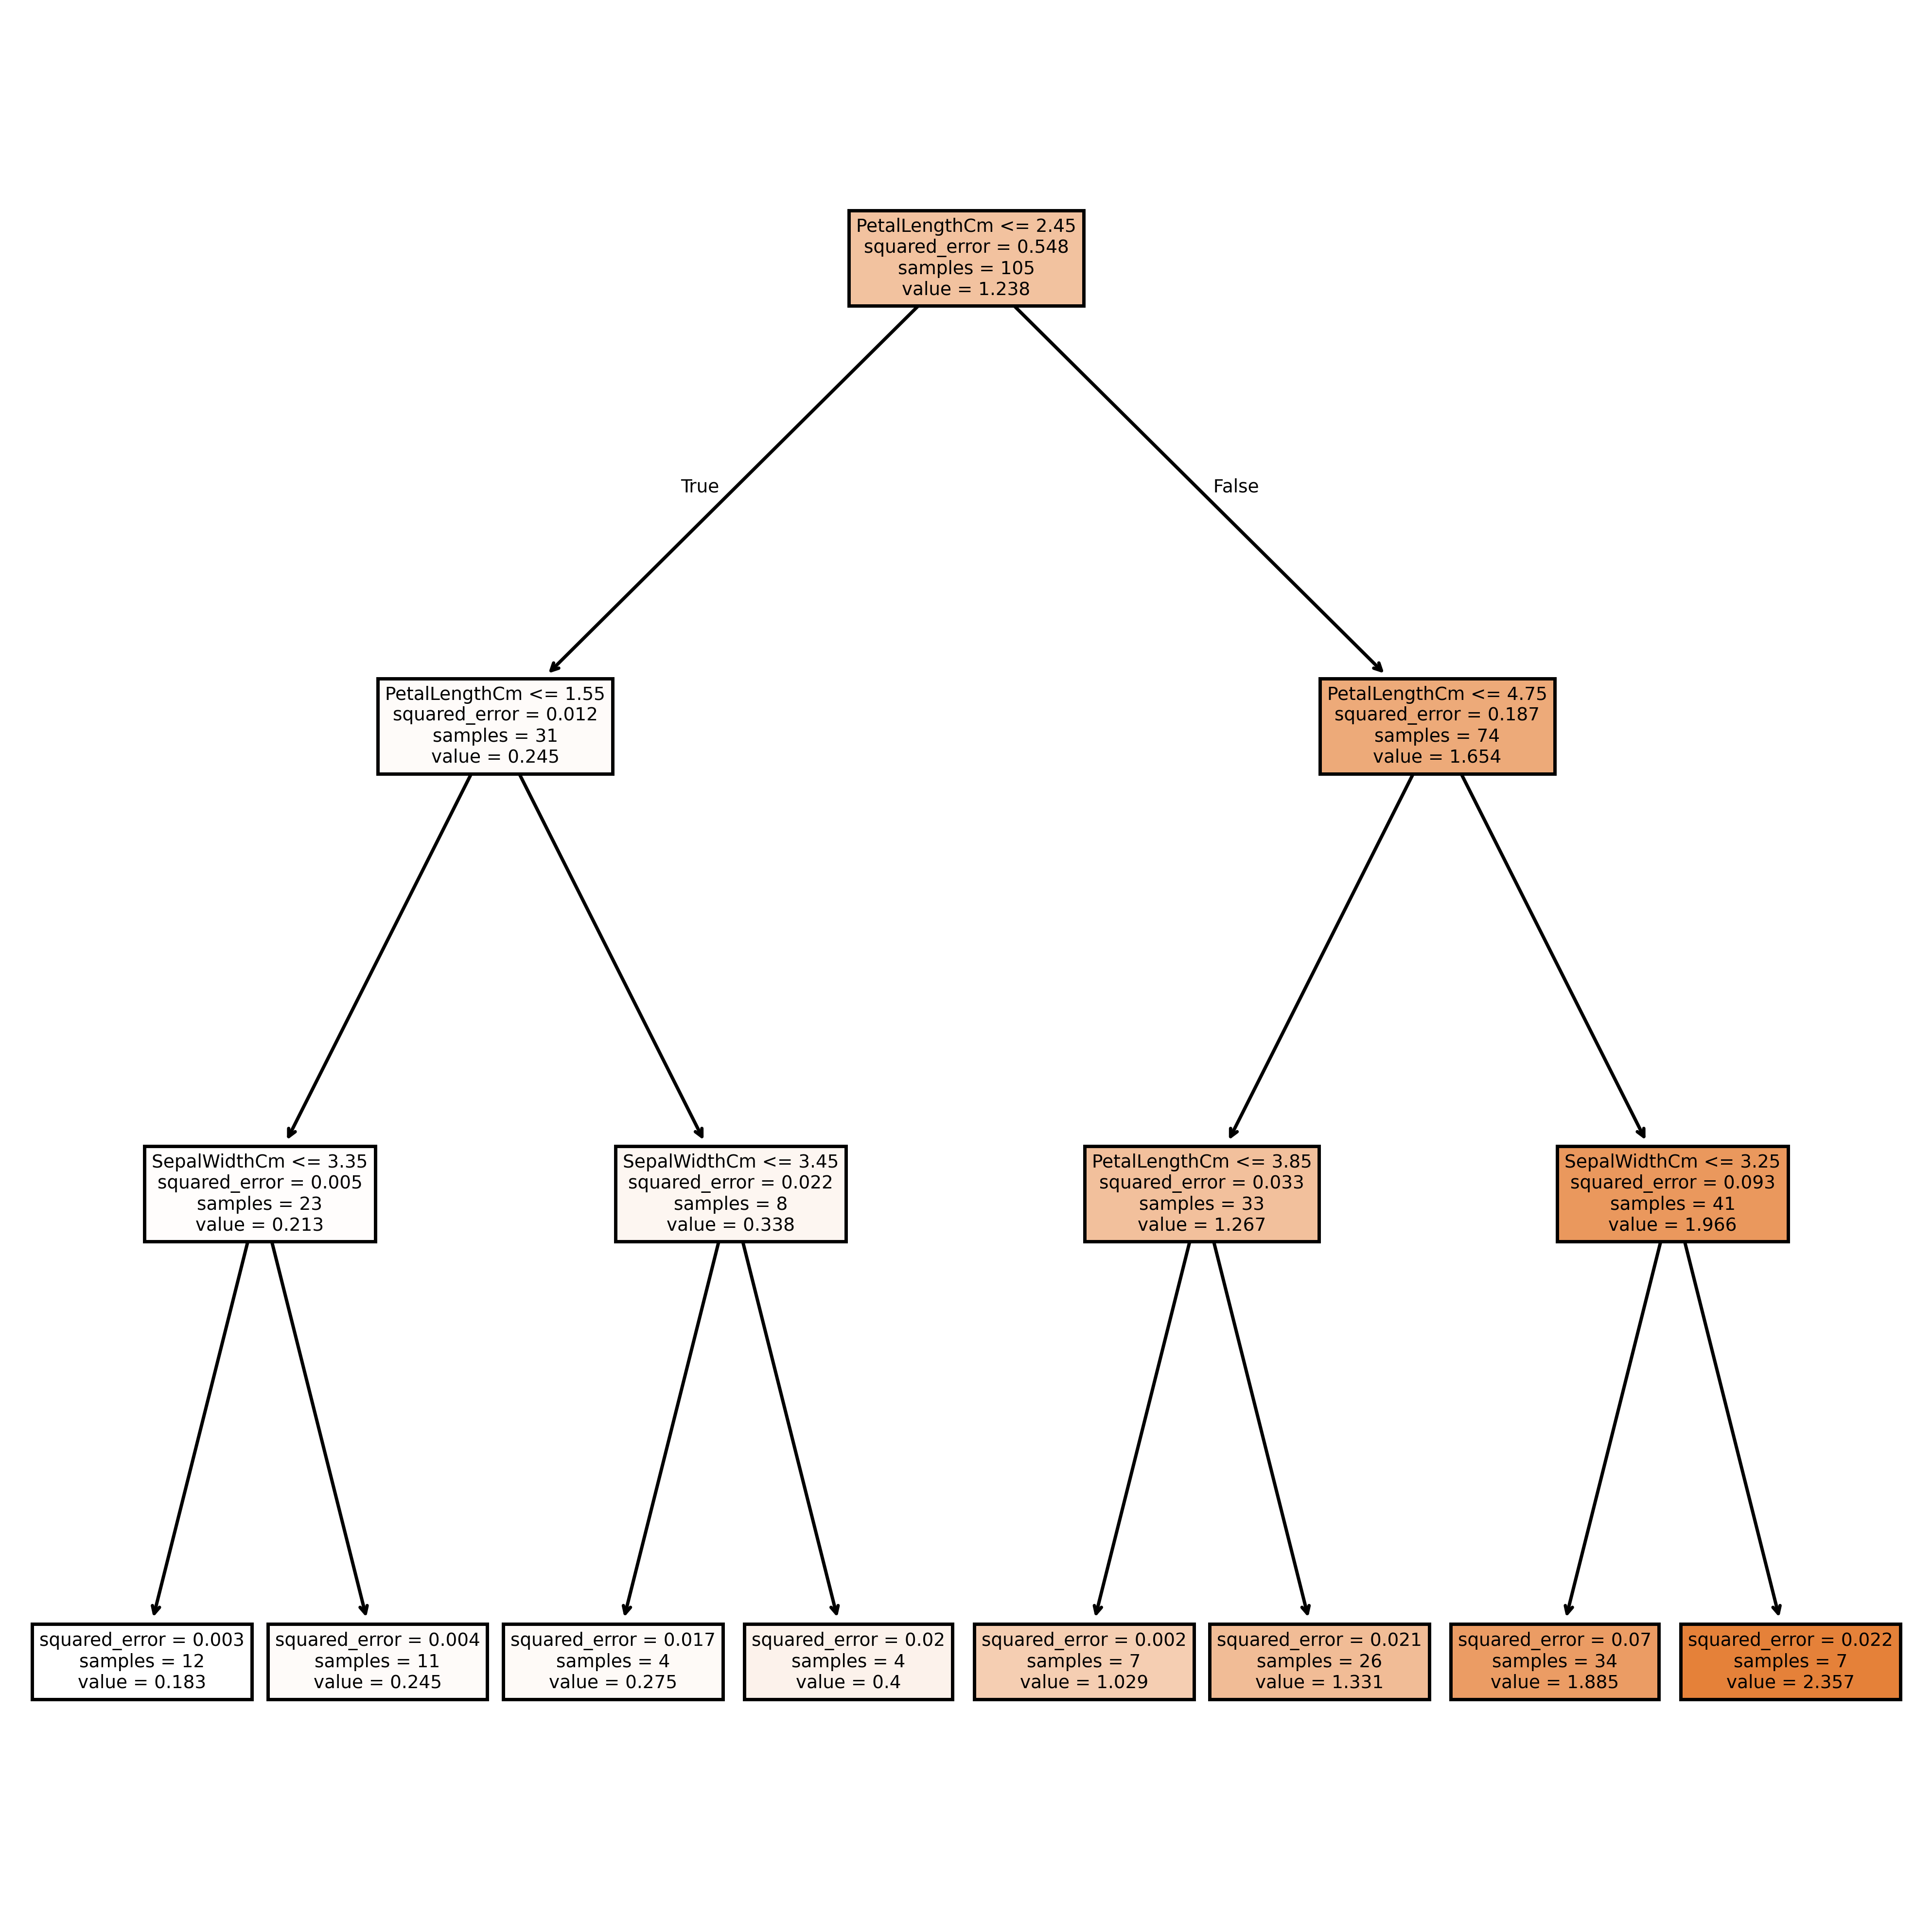

In [51]:

tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],filled=True)
plt.show()